In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_X_raw, train_Y_raw), (test_X_raw,test_Y_raw) = reuters.load_data(num_words=20000)

In [3]:
word_to_index = reuters.get_word_index()
index_to_word = dict([ (word_to_index[k],k) for k in word_to_index.keys() ])

In [4]:
first_sentence = ' '.join([ index_to_word.get(i-3,'?') for i in train_X_raw[0] ])
first_sentence

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
def to_one_vector(sequences):
    results = np.zeros((len(sequences), 20000))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_X = to_one_vector(train_X_raw)
test_X = to_one_vector(test_X_raw)
train_Y_category = to_categorical(train_Y_raw)
test_Y_category = to_categorical(test_Y_raw)

In [6]:
total_classes = 46

In [9]:
def getModel( loss='categorical_crossentropy' ):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(20000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(total_classes, activation='softmax'))
    model.compile(optimizer='adagrad', loss=loss, metrics=['accuracy'])
    return model

def fitAndPlot( train_X, train_Y, test_X, test_Y ):
    train_X = train_X[1000:]
    val_X = train_X[:1000]
    train_Y = train_Y[1000:]
    val_Y = train_Y[:1000]
    history = model.fit(train_X, train_Y, epochs=20, batch_size=512, verbose=0, validation_data=(val_X, val_Y))
    
    plt.figure(figsize=(8,6))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b+', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r.', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    results = model.evaluate(train_X, train_Y, verbose=0)
    print('Training accuracy is %3.2f%%' %(results[1]*100))
    results = model.evaluate(test_X, test_Y, verbose=0)
    print('Test accuracy is %3.2f%%' %(results[1]*100))

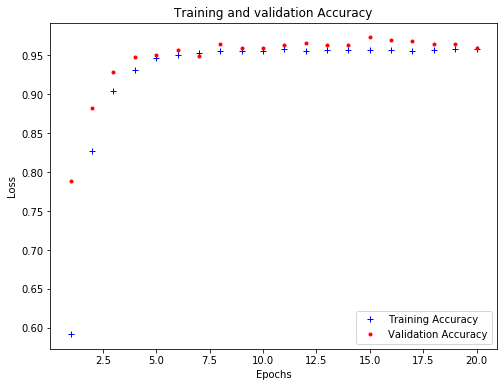

Training accuracy is 96.88%
Test accuracy is 79.12%


In [10]:
model = getModel()
fitAndPlot( train_X, train_Y_category, test_X, test_Y_category )

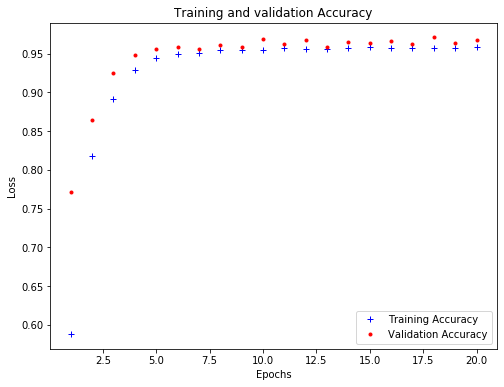

Training accuracy is 96.89%
Test accuracy is 78.98%


In [12]:
model = getModel('sparse_categorical_crossentropy')
fitAndPlot( train_X, train_Y_raw, test_X, test_Y_raw )